In [2]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import os

#helps resolve path problems
base = os.getcwd()

filepath =  os.path.join(base, "../data/cleaned_COUNTY_data.csv")

cleaned_df = pd.DataFrame(pd.read_csv(filepath))

In [3]:
#get target crops from txt file
with open("croptarget.txt") as f:
    crops = [line.strip() for line in f.readlines() if line.strip()]

print(crops)

['BARLEY', 'BEANS', 'BEETS', 'CANOLA', 'CORN', 'COTTON', 'GRAIN', 'GRASSES', 'GRASSES & LEGUMES, OTHER', 'GUAR', 'HAY', 'HAY & HAYLAGE', 'HAYLAGE', 'MILLET', 'MINT', 'MISCANTHUS', 'MUSTARD', 'OATS', 'PEANUTS', 'POPcorn', 'RICE', 'RYE', 'SAFFLOWER', 'SESAME', 'SORGHUM', 'SUGARCANE', 'SUNFLOWER', 'TRITICALE', 'WHEAT']


In [4]:
#NaN values for unreported numbers from farms
cleaned_df = cleaned_df.fillna(0)
cleaned_df.drop("Unnamed: 0",axis=1,inplace=True)
cleaned_df

,YEAR,AGLAND_AGLANDACRES,AGLAND_AGLANDCROPINSURANCEACRES,AGLAND_AGLANDCROPINSURANCENUMBEROFOPERATIONS,AGLAND_AGLANDCROPLANDACRES,AGLAND_AGLANDCROPLANDAREAMEASUREDINPCTOFAGLAND,AGLAND_AGLANDCROPLANDEXCLHARVESTEDPASTUREDACRES,AGLAND_AGLANDCROPLANDEXCLHARVESTEDPASTUREDALLCROPSFAILEDACRES,AGLAND_AGLANDCROPLANDEXCLHARVESTEDPASTUREDALLCROPSFAILEDNUMBEROFOPERATIONS,AGLAND_AGLANDCROPLANDEXCLHARVESTEDPASTUREDCULTIVATEDSUMMERFALLOWACRES,...,WHEAT_WHEATSPRINGEXCLDURUMPRODUCTIONMEASUREDINBU,WHEAT_WHEATWINTERACRESHARVESTED,WHEAT_WHEATWINTERIRRIGATEDACRESHARVESTED,WHEAT_WHEATWINTERIRRIGATEDOPERATIONSWITHAREAHARVESTED,WHEAT_WHEATWINTEROPERATIONSWITHAREAHARVESTED,WHEAT_WHEATWINTERPRODUCTIONMEASUREDINBU,WOOL_WOOLOPERATIONSWITHPRODUCTION,WOOL_WOOLPRODUCTIONMEASUREDINLB,WOOL_WOOLSALESMEASUREDIN,COUNTY_NAME
0,2012,7391.0,10512.0,32.0,70333.0,13.75,4862.0,3134.0,85.0,858.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,ANDERSON
1,2017,32795.0,14907.0,14.0,63774.0,13.75,4239.5,1979.0,59.0,2112.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,ANDERSON
2,2022,32469.0,16196.0,41.0,69021.0,13.75,5632.0,2740.0,103.0,3542.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,ANDERSON
3,2012,24662.0,23915.0,19.0,71517.0,8.00,29342.5,9247.0,26.0,7806.0,...,0.0,1500.0,320.0,2.0,2.0,31400.0,1.0,2250.0,0.0,ANDREWS
4,2017,32830.0,322066.0,12.0,78257.0,8.00,35201.5,9247.0,12.0,7806.0,...,0.0,1500.0,320.0,4.0,7.0,31400.0,2.0,2250.0,0.0,ANDREWS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2017,15203.0,21736.0,21.0,18856.0,6.50,12208.0,247.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,ZAPATA
758,2022,4025.0,23413.0,17.0,5980.0,6.50,1897.5,247.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,ZAPATA
759,2012,295056.0,50198.0,39.0,95980.0,9.50,11980.5,4298.0,27.0,4936.0,...,0.0,3978.0,2206.0,10.0,23.0,247228.0,1.0,0.0,0.0,ZAVALA
760,2017,401018.0,57149.0,39.0,76046.0,9.50,15045.0,1731.0,12.0,10893.0,...,0.0,3978.0,2206.0,13.0,19.0,247228.0,1.0,0.0,0.0,ZAVALA


In [5]:
#find columns based on <crop> _ PRODUCTION for target df
target_cols = [
    col for col in cleaned_df.columns
    if col.split("_")[0] in crops and "PRODUCTION" in col.upper()
]

target_df = cleaned_df[target_cols]

In [6]:
#from EDA we found Hay to have the most usable data at index 19
target_hay = target_df['HAY_HAYPRODUCTIONMEASUREDINTONS']

target_hay

0       93093.0
1       92932.0
2      103167.0
3        1877.0
4         795.0
         ...   
757      1066.0
758       882.0
759      9089.0
760     20933.0
761     19441.0
Name: HAY_HAYPRODUCTIONMEASUREDINTONS, Length: 762, dtype: float64

In [7]:
leakage_patterns = ["PRODUCTION", "HARVESTED", "HARVEST", "YIELD"]

mask = ~cleaned_df.columns.str.contains("|".join(leakage_patterns), case=False)

X_clean = cleaned_df.loc[:, mask]

In [8]:
X_clean.shape

(762, 1456)

In [9]:
#prep for tensorflow
X = X_clean.drop(X_clean.columns[[0,1454]], axis=1, errors="ignore")
y = target_hay

X = X.apply(pd.to_numeric, errors="coerce")

X

,AGLAND_AGLANDACRES,AGLAND_AGLANDCROPINSURANCEACRES,AGLAND_AGLANDCROPINSURANCENUMBEROFOPERATIONS,AGLAND_AGLANDCROPLANDACRES,AGLAND_AGLANDCROPLANDAREAMEASUREDINPCTOFAGLAND,AGLAND_AGLANDCROPLANDEXCLPASTUREDOPERATIONSWITHTREATED,AGLAND_AGLANDCROPLANDEXCLPASTUREDTREATEDMEASUREDINACRES,AGLAND_AGLANDCROPLANDNUMBEROFOPERATIONS,AGLAND_AGLANDCROPLANDPASTUREDONLYACRES,AGLAND_AGLANDCROPLANDPASTUREDONLYNUMBEROFOPERATIONS,...,WALNUTS_WALNUTSENGLISHACRESBEARING,WALNUTS_WALNUTSENGLISHACRESBEARINGNONBEARING,WALNUTS_WALNUTSENGLISHACRESNONBEARING,WALNUTS_WALNUTSENGLISHOPERATIONSWITHAREABEARING,WALNUTS_WALNUTSENGLISHOPERATIONSWITHAREABEARINGNONBEARING,WALNUTS_WALNUTSENGLISHOPERATIONSWITHAREANONBEARING,WATER_WATERIRRIGATIONSOURCEOFFFARMSUPPLIERFEDERALBUREAUOFRECLAMATIONOPERATIONSWITHWATERRECEIVED,WHEAT_WHEATOPERATIONSWITHSALES,WHEAT_WHEATSALESMEASUREDIN,COUNTY_NAME
0,7391.0,10512.0,32.0,70333.0,13.75,349.0,16018.0,1252.0,6300.0,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,NaN
1,32795.0,14907.0,14.0,63774.0,13.75,335.0,21529.0,1098.0,3018.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,NaN
2,32469.0,16196.0,41.0,69021.0,13.75,341.0,19072.0,1041.0,6817.0,106.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,NaN
3,24662.0,23915.0,19.0,71517.0,8.00,28.0,11196.0,113.0,3163.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,NaN
4,32830.0,322066.0,12.0,78257.0,8.00,30.0,13780.0,81.0,3163.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,15203.0,21736.0,21.0,18856.0,6.50,8.0,1275.0,52.0,3105.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN
758,4025.0,23413.0,17.0,5980.0,6.50,3.0,1507.5,36.0,1953.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN
759,295056.0,50198.0,39.0,95980.0,9.50,48.0,27759.0,118.0,42662.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,1655000.0,NaN
760,401018.0,57149.0,39.0,76046.0,9.50,38.0,34367.0,121.0,17766.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1044000.0,NaN


In [10]:
corr_matrix = pd.DataFrame(X).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop them
X_reduced = X.drop(columns=to_drop)
print("Dropped highly correlated features:", len(to_drop))

Dropped highly correlated features: 495


In [11]:
y.shape

(762,)

In [12]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Step 1: Use the correlation-cleaned feature matrix
X_corrclean = X_reduced   # (after leakage removal + correlation filtering)

# Step 2: Initialize importance vector with correct length
importances = np.zeros(X_corrclean.shape[1])

# Step 3: Loop over each production target (each crop)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_corrclean, y.iloc[:,])
importances += rf.feature_importances_

# Step 4: Select top 200 most important features
top_idx = np.argsort(importances)[-200:]

# Step 6: Reduce dataset
X_reduced = X_corrclean.iloc[:, top_idx]

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_scaled)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

In [16]:
#This score is a lot better than when trying to predict production for all 42 crops
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.score(X_val, y_val))


0.7238816934739996


Linear Regression Performance:
MAE: 9056.647045698111
RMSE: 13209.745167371735
R²: 0.8671710297901866


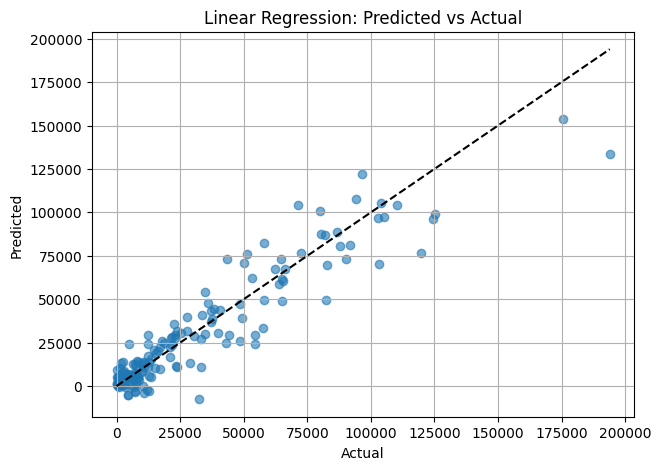

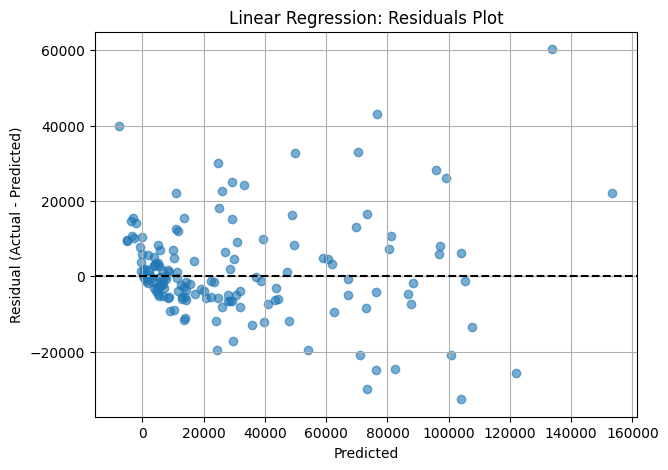

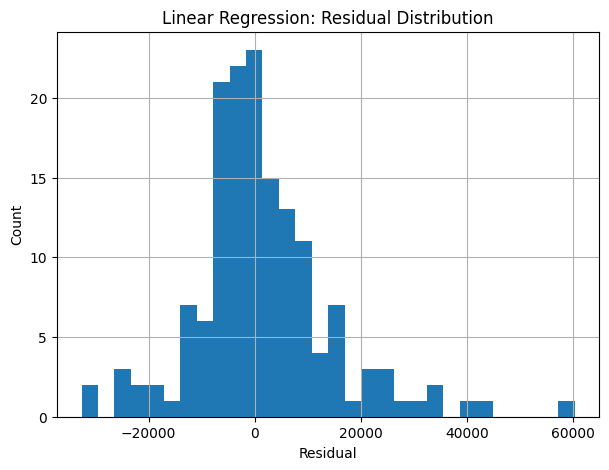

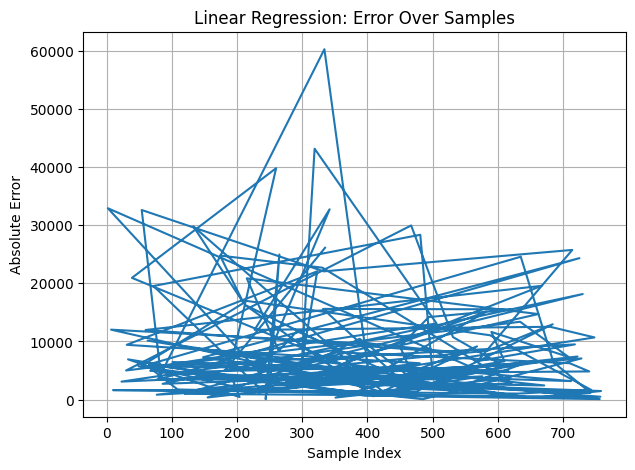

In [21]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lr = linreg.predict(X_val)

# Compute metrics
mae = mean_absolute_error(y_val, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_lr))
r2 = r2_score(y_val, y_pred_lr)

print("Linear Regression Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

# ------------------------------
# 1. Predicted vs. Actual
# ------------------------------
plt.figure(figsize=(7,5))
plt.scatter(y_val, y_pred_lr, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Predicted vs Actual")
plt.grid(True)
plt.show()

# ------------------------------
# 2. Residuals vs Predicted
# ------------------------------
residuals = y_val - y_pred_lr

plt.figure(figsize=(7,5))
plt.scatter(y_pred_lr, residuals, alpha=0.6)
plt.axhline(0, linestyle='--', color='black')
plt.xlabel("Predicted")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Linear Regression: Residuals Plot")
plt.grid(True)
plt.show()

# ------------------------------
# 3. Residual Distribution
# ------------------------------
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Linear Regression: Residual Distribution")
plt.grid(True)
plt.show()

# ------------------------------
# 4. Error Over Samples (optional)
# ------------------------------
plt.figure(figsize=(7,5))
plt.plot(np.abs(residuals))
plt.xlabel("Sample Index")
plt.ylabel("Absolute Error")
plt.title("Linear Regression: Error Over Samples")
plt.grid(True)
plt.show()
